I use [detectorn2](https://github.com/facebookresearch/detectron2) to deal with the faster RCNN

In [1]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [2]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from matplotlib.pyplot import imshow
from PIL import Image
import IPython
def cv2_imshow(img):
    img = img[:,:,[2,1,0]]
    img = Image.fromarray(img)
    plt.figure(figsize=(20, 20))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    #display(data=img)

In [3]:
import csv
train, test = [],[]
def take_path(x,d):
    with open(d) as t:
        #print(t.read())
        #print(type(csv.reader(t)))
        tmp = csv.reader(t,delimiter=' ')
        for i in tmp:
            x.append(i)
        for ele in x:
            ele[0] = '../PCBData/'+ele[0][:-4]+'_test.jpg'
            ele[1] = '../PCBData/'+ele[1]

take_path(test,'../PCBData/test.txt')
print(test[:5])
take_path(train,'../PCBData/trainval.txt')
print(train[:2])


[['../PCBData/group20085/20085/20085291_test.jpg', '../PCBData/group20085/20085_not/20085291.txt'], ['../PCBData/group20085/20085/20085292_test.jpg', '../PCBData/group20085/20085_not/20085292.txt'], ['../PCBData/group20085/20085/20085293_test.jpg', '../PCBData/group20085/20085_not/20085293.txt'], ['../PCBData/group20085/20085/20085294_test.jpg', '../PCBData/group20085/20085_not/20085294.txt'], ['../PCBData/group20085/20085/20085295_test.jpg', '../PCBData/group20085/20085_not/20085295.txt']]
[['../PCBData/group20085/20085/20085000_test.jpg', '../PCBData/group20085/20085_not/20085000.txt'], ['../PCBData/group20085/20085/20085001_test.jpg', '../PCBData/group20085/20085_not/20085001.txt']]


In [4]:
height, width = cv2.imread('../PCBData/group20085/20085/20085291_test.jpg').shape[:2]
print(height, width)
DatasetCatalog.clear()

640 640


NameError: name 'DatasetCatalog' is not defined

In [11]:
import os
import numpy as np
import json
from detectron2.structures import BoxMode
def get_PCB_dict(data_list):
    dataset_dicts = []
    
    for i,path in enumerate(data_list):
        filename = path[0]
        height, width = cv2.imread(filename).shape[:2]
        record = {}
        record['file_name'] = filename
        record['image_id'] = i
        record['height']= height
        record['width']= width
        
        #for i in data_list[1] to get bbox and category
        objs = []
        with open(path[1]) as t:
            lines = t.readlines()
            for line in lines:
                box = line[:-1].split(' ')
                boxes = list(map(float,[box[0],box[3],box[2],box[1]]))
                category = int(box[4])

                obj = {
                    "bbox": boxes,
                    "bbox_mode": BoxMode.XYXY_ABS,
                    #"segmentation": [poly], To draw a line, along to ballo0n
                    "category_id": category-1,
                    "iscrowd": 0
                }
                objs.append(obj)
            record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts #list of dicts

In [12]:
from detectron2.data import DatasetCatalog, MetadataCatalog
for d,x in [("train",train), ("test",test)]:
    DatasetCatalog.register("PCB_" + d, lambda x=x: get_PCB_dict(x))
    MetadataCatalog.get("PCB_" + d).set(thing_classes=["open", "short", "mousebite", "spur", "copper", "pin-hole"],thing_colors=[(255,0,0),(0,255,0),(0,0,255),(255,255,0),(255,0,255),(0,255,255)])
    #I set the colors, but it's no use. Retry after training.
PCB_metadata = MetadataCatalog.get("PCB_train")

AssertionError: Dataset 'PCB_train' is already registered!

In [13]:
#check dataset
print(type(PCB_metadata))
MetadataCatalog.get("PCB_test")

<class 'detectron2.data.catalog.Metadata'>


Metadata(name='PCB_test', thing_classes=['open', 'short', 'mousebite', 'spur', 'copper', 'pin-hole'], thing_colors=[(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255), (0, 255, 255)])

In [14]:
dataset_dicts = get_PCB_dict(train)

In [15]:
print(dataset_dicts[0])
print(dataset_dicts[1])

{'file_name': '../PCBData/group20085/20085/20085000_test.jpg', 'image_id': 0, 'height': 640, 'width': 640, 'annotations': [{'bbox': [409.0, 422.0, 435.0, 394.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 2, 'iscrowd': 0}, {'bbox': [275.0, 417.0, 319.0, 383.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 2, 'iscrowd': 0}, {'bbox': [8.0, 191.0, 36.0, 163.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 3, 'iscrowd': 0}, {'bbox': [244.0, 182.0, 270.0, 151.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 4, 'iscrowd': 0}, {'bbox': [338.0, 543.0, 364.0, 519.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 5, 'iscrowd': 0}, {'bbox': [476.0, 481.0, 502.0, 460.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 3, 'iscrowd': 0}]}
{'file_name': '../PCBData/group20085/20085/20085001_test.jpg', 'image_id': 1, 'height': 640, 'width': 640, 'annotations': [{'bbox': [335.0, 233.0, 364.0, 208.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 2, 'iscrowd': 0}, 

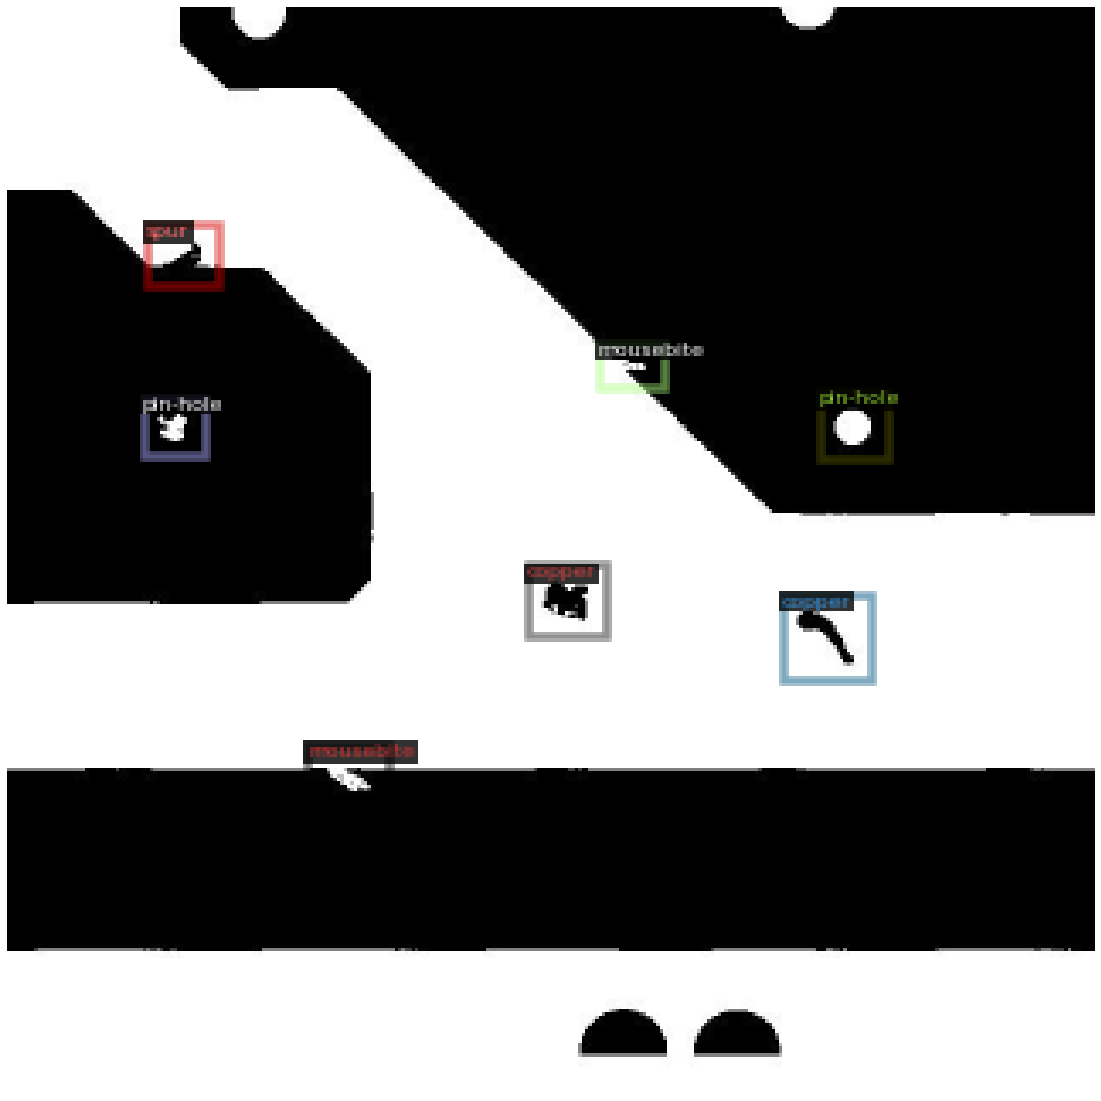

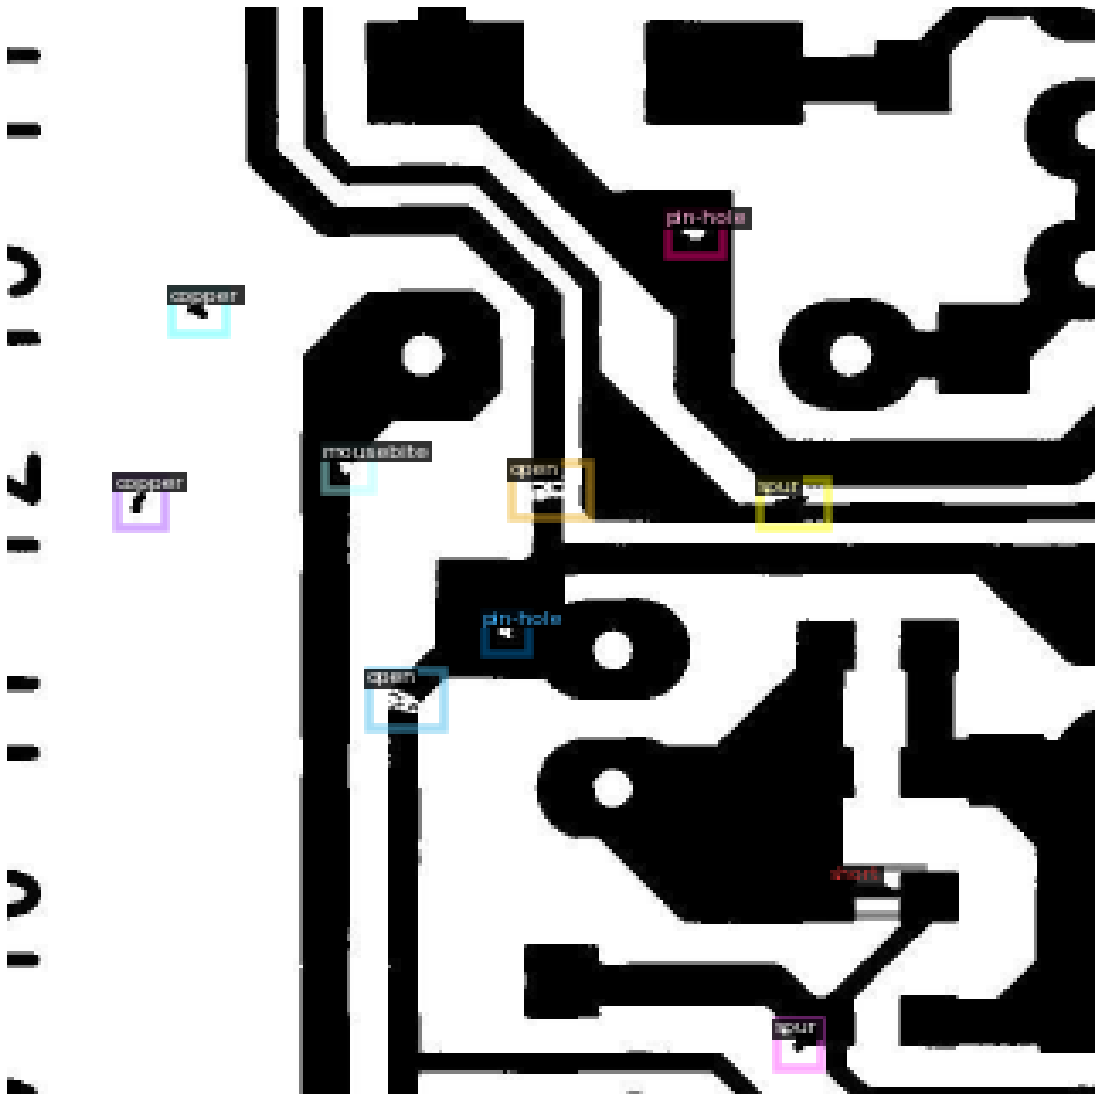

In [16]:
for d in random.sample(dataset_dicts, 2):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=PCB_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [48]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("PCB_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 0
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl"  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 30000    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 2048   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6 

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[01/14 14:07:47 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

'roi_heads.box_predictor.cls_score.weight' has shape (81, 1024) in the checkpoint but (7, 1024) in the model! Skipped.
'roi_heads.box_predictor.cls_score.bias' has shape (81,) in the checkpoint but (7,) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.weight' has shape (320, 1024) in the checkpoint but (24, 1024) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.bias' has shape (320,) in the checkpoint but (24,) in the model! Skipped.


[01/14 14:07:55 d2.engine.train_loop]: Starting training from iteration 0
[01/14 14:08:02 d2.utils.events]: eta: 3:15:12  iter: 19  total_loss: 2.576  loss_cls: 1.914  loss_box_reg: 0.027  loss_rpn_cls: 0.482  loss_rpn_loc: 0.149  time: 0.3847  data_time: 0.1228  lr: 0.000005  max_mem: 4487M
[01/14 14:08:10 d2.utils.events]: eta: 3:17:59  iter: 39  total_loss: 2.302  loss_cls: 1.720  loss_box_reg: 0.049  loss_rpn_cls: 0.433  loss_rpn_loc: 0.142  time: 0.3833  data_time: 0.1226  lr: 0.000010  max_mem: 4487M
[01/14 14:08:18 d2.utils.events]: eta: 3:17:51  iter: 59  total_loss: 1.857  loss_cls: 1.376  loss_box_reg: 0.036  loss_rpn_cls: 0.270  loss_rpn_loc: 0.165  time: 0.3851  data_time: 0.1273  lr: 0.000015  max_mem: 4487M
[01/14 14:08:26 d2.utils.events]: eta: 3:18:53  iter: 79  total_loss: 1.351  loss_cls: 0.900  loss_box_reg: 0.030  loss_rpn_cls: 0.233  loss_rpn_loc: 0.125  time: 0.3936  data_time: 0.1519  lr: 0.000020  max_mem: 4487M
[01/14 14:08:34 d2.utils.events]: eta: 3:17:35  it

OrderedDict()

In [49]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
cfg.DATASETS.TEST = ("PCB_test", )
predictor = DefaultPredictor(cfg)

In [50]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts = get_PCB_dict(test)

tensor([0, 4, 1, 2, 2, 2], device='cuda:0')
Boxes(tensor([[200.0055, 126.2526, 232.7585, 167.1771],
        [328.1161, 343.2622, 374.0931, 368.8010],
        [395.8418, 113.5676, 430.7911, 149.6601],
        [485.6799,  56.8340, 534.7773,  86.9535],
        [218.7519, 317.4904, 282.1273, 348.9644],
        [284.8288,  29.5107, 337.8197,  67.4750]], device='cuda:0'))


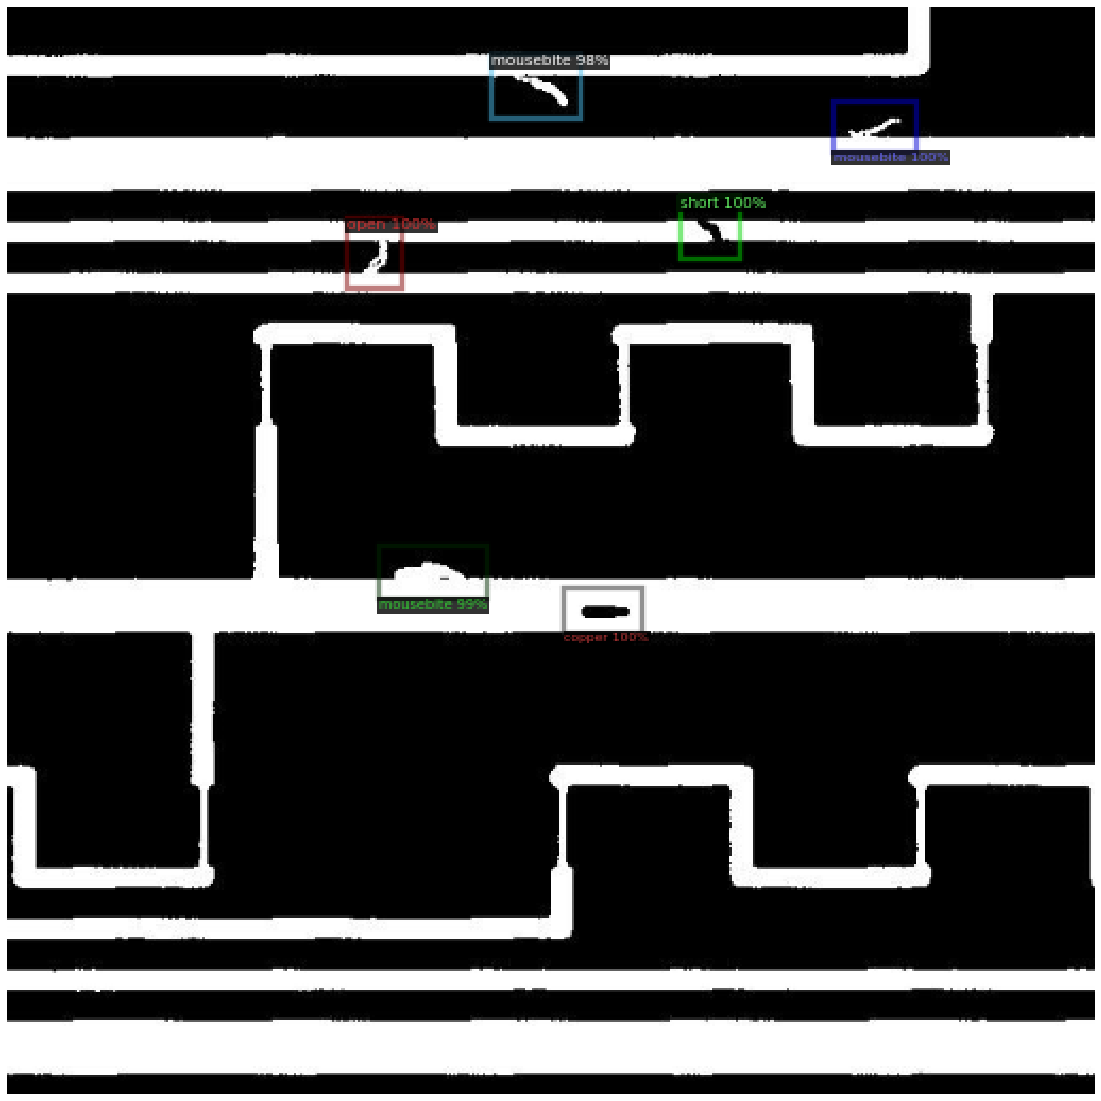

tensor([4, 2, 5, 1, 3, 0], device='cuda:0')
Boxes(tensor([[248.5640,  14.3211, 292.4607,  45.3383],
        [120.7639, 278.9315, 151.5195, 304.5669],
        [221.3529,  55.6225, 254.8887,  79.8509],
        [113.0602, 450.9998, 138.4599, 484.0588],
        [395.2016, 288.2532, 435.7316, 315.4614],
        [198.4503, 434.4218, 230.6306, 463.8349]], device='cuda:0'))


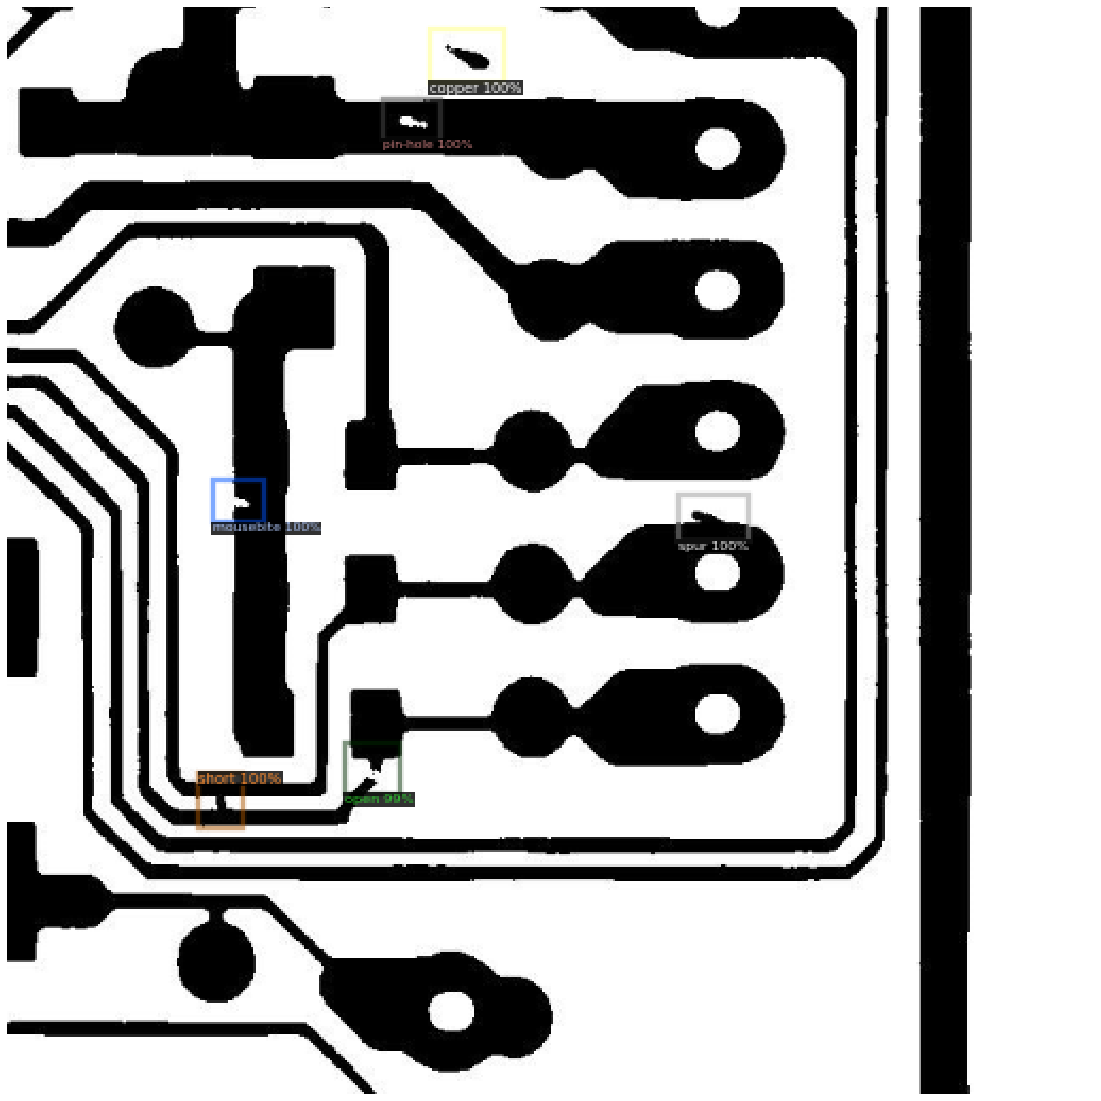

tensor([5, 4, 0, 1, 2, 0], device='cuda:0')
Boxes(tensor([[469.4973, 316.8748, 505.2197, 350.1700],
        [341.4503, 193.3569, 377.7070, 234.6836],
        [242.8340, 263.2058, 276.3328, 302.7939],
        [ 97.8733, 517.9461, 146.4714, 557.9069],
        [ 94.3836, 187.4380, 128.7272, 214.4223],
        [201.1240, 447.2838, 235.6772, 476.6936]], device='cuda:0'))


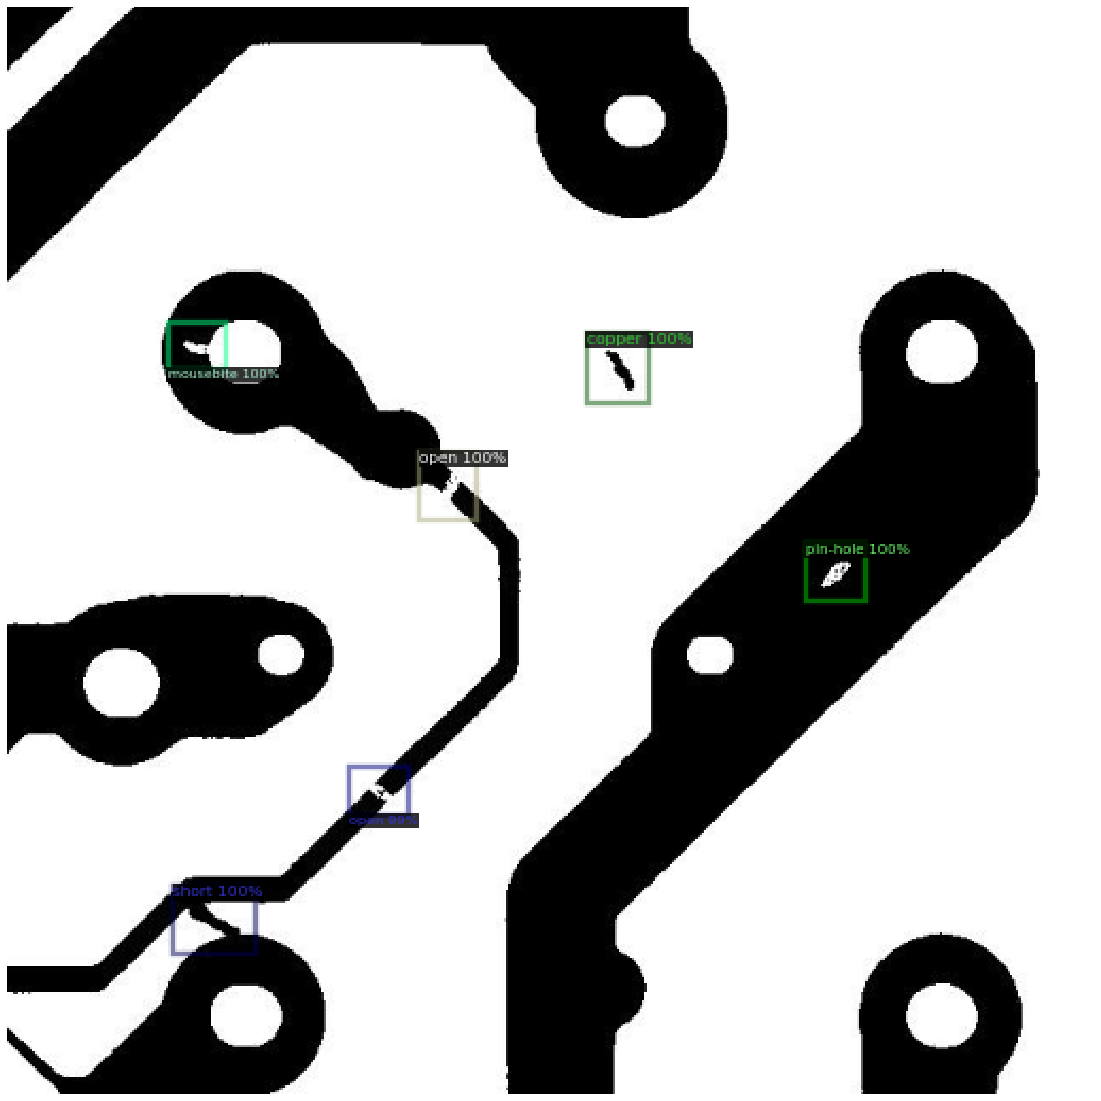

In [51]:
for d in random.sample(dataset_dicts, 3):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=PCB_metadata, 
                   scale=0.8,
                   instance_mode =  ColorMode.IMAGE
        )
                   # remove the colors of unsegmented pixels
    print(outputs['instances'].pred_classes)
    print(outputs["instances"].pred_boxes)

    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [52]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("PCB_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "PCB_test")
inference_on_dataset(trainer.model, val_loader, evaluator)
# another equivalent way is to use trainer.test

[01/14 17:22:22 d2.evaluation.evaluator]: Start inference on 500 images
[01/14 17:22:24 d2.evaluation.evaluator]: Inference done 11/500. 0.1280 s / img. ETA=0:01:26
[01/14 17:22:29 d2.evaluation.evaluator]: Inference done 38/500. 0.1422 s / img. ETA=0:01:24
[01/14 17:22:34 d2.evaluation.evaluator]: Inference done 66/500. 0.1390 s / img. ETA=0:01:18
[01/14 17:22:39 d2.evaluation.evaluator]: Inference done 93/500. 0.1434 s / img. ETA=0:01:14
[01/14 17:22:44 d2.evaluation.evaluator]: Inference done 120/500. 0.1460 s / img. ETA=0:01:09
[01/14 17:22:49 d2.evaluation.evaluator]: Inference done 148/500. 0.1461 s / img. ETA=0:01:04
[01/14 17:22:54 d2.evaluation.evaluator]: Inference done 175/500. 0.1456 s / img. ETA=0:00:59
[01/14 17:22:59 d2.evaluation.evaluator]: Inference done 203/500. 0.1451 s / img. ETA=0:00:54
[01/14 17:23:04 d2.evaluation.evaluator]: Inference done 231/500. 0.1449 s / img. ETA=0:00:49
[01/14 17:23:09 d2.evaluation.evaluator]: Inference done 259/500. 0.1440 s / img. ETA=

OrderedDict([('bbox',
              {'AP': -100.0,
               'AP50': -100.0,
               'AP75': -100.0,
               'APs': -100.0,
               'APm': -100.0,
               'APl': -100.0,
               'AP-open': nan,
               'AP-short': nan,
               'AP-mousebite': nan,
               'AP-spur': nan,
               'AP-copper': nan,
               'AP-pin-hole': nan})])